В этом скрипте соединение 1 сессии ЭЭГ записи и данных с планшета

In [263]:
import pandas as pd
import numpy as np
import mne
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [1322]:
subject='S105'
code='5'

## Загружаем таблицу с письмом

In [1325]:
trials=pd.read_csv(subject+'/Preprocessed/'+code+'/trials_processed.csv',sep=';')

In [1327]:
trials

,Unnamed: 0,INPUT,ts,ResetCounter,X,Y,Epoch
0,0,/dev/input/event0:,0.000000,0,220,384.0,0
1,1,/dev/input/event0:,348.160004,160,213,381.0,1
2,2,/dev/input/event0:,348.260126,160,220,381.0,1
3,3,/dev/input/event0:,348.277078,160,237,379.0,1
4,4,/dev/input/event0:,348.293806,160,253,378.0,1
...,...,...,...,...,...,...,...
3996,3996,/dev/input/event0:,424.952691,196,257,633.0,49
3997,3997,/dev/input/event0:,424.969573,196,257,631.0,49
3998,3998,/dev/input/event0:,424.986298,196,257,630.0,49
3999,3999,/dev/input/event0:,425.003068,196,257,629.0,49


In [1329]:
plt.plot(trials['X'].values)

## Визуализируем цифры, написанные испытуемым

In [1332]:
%matplotlib inline

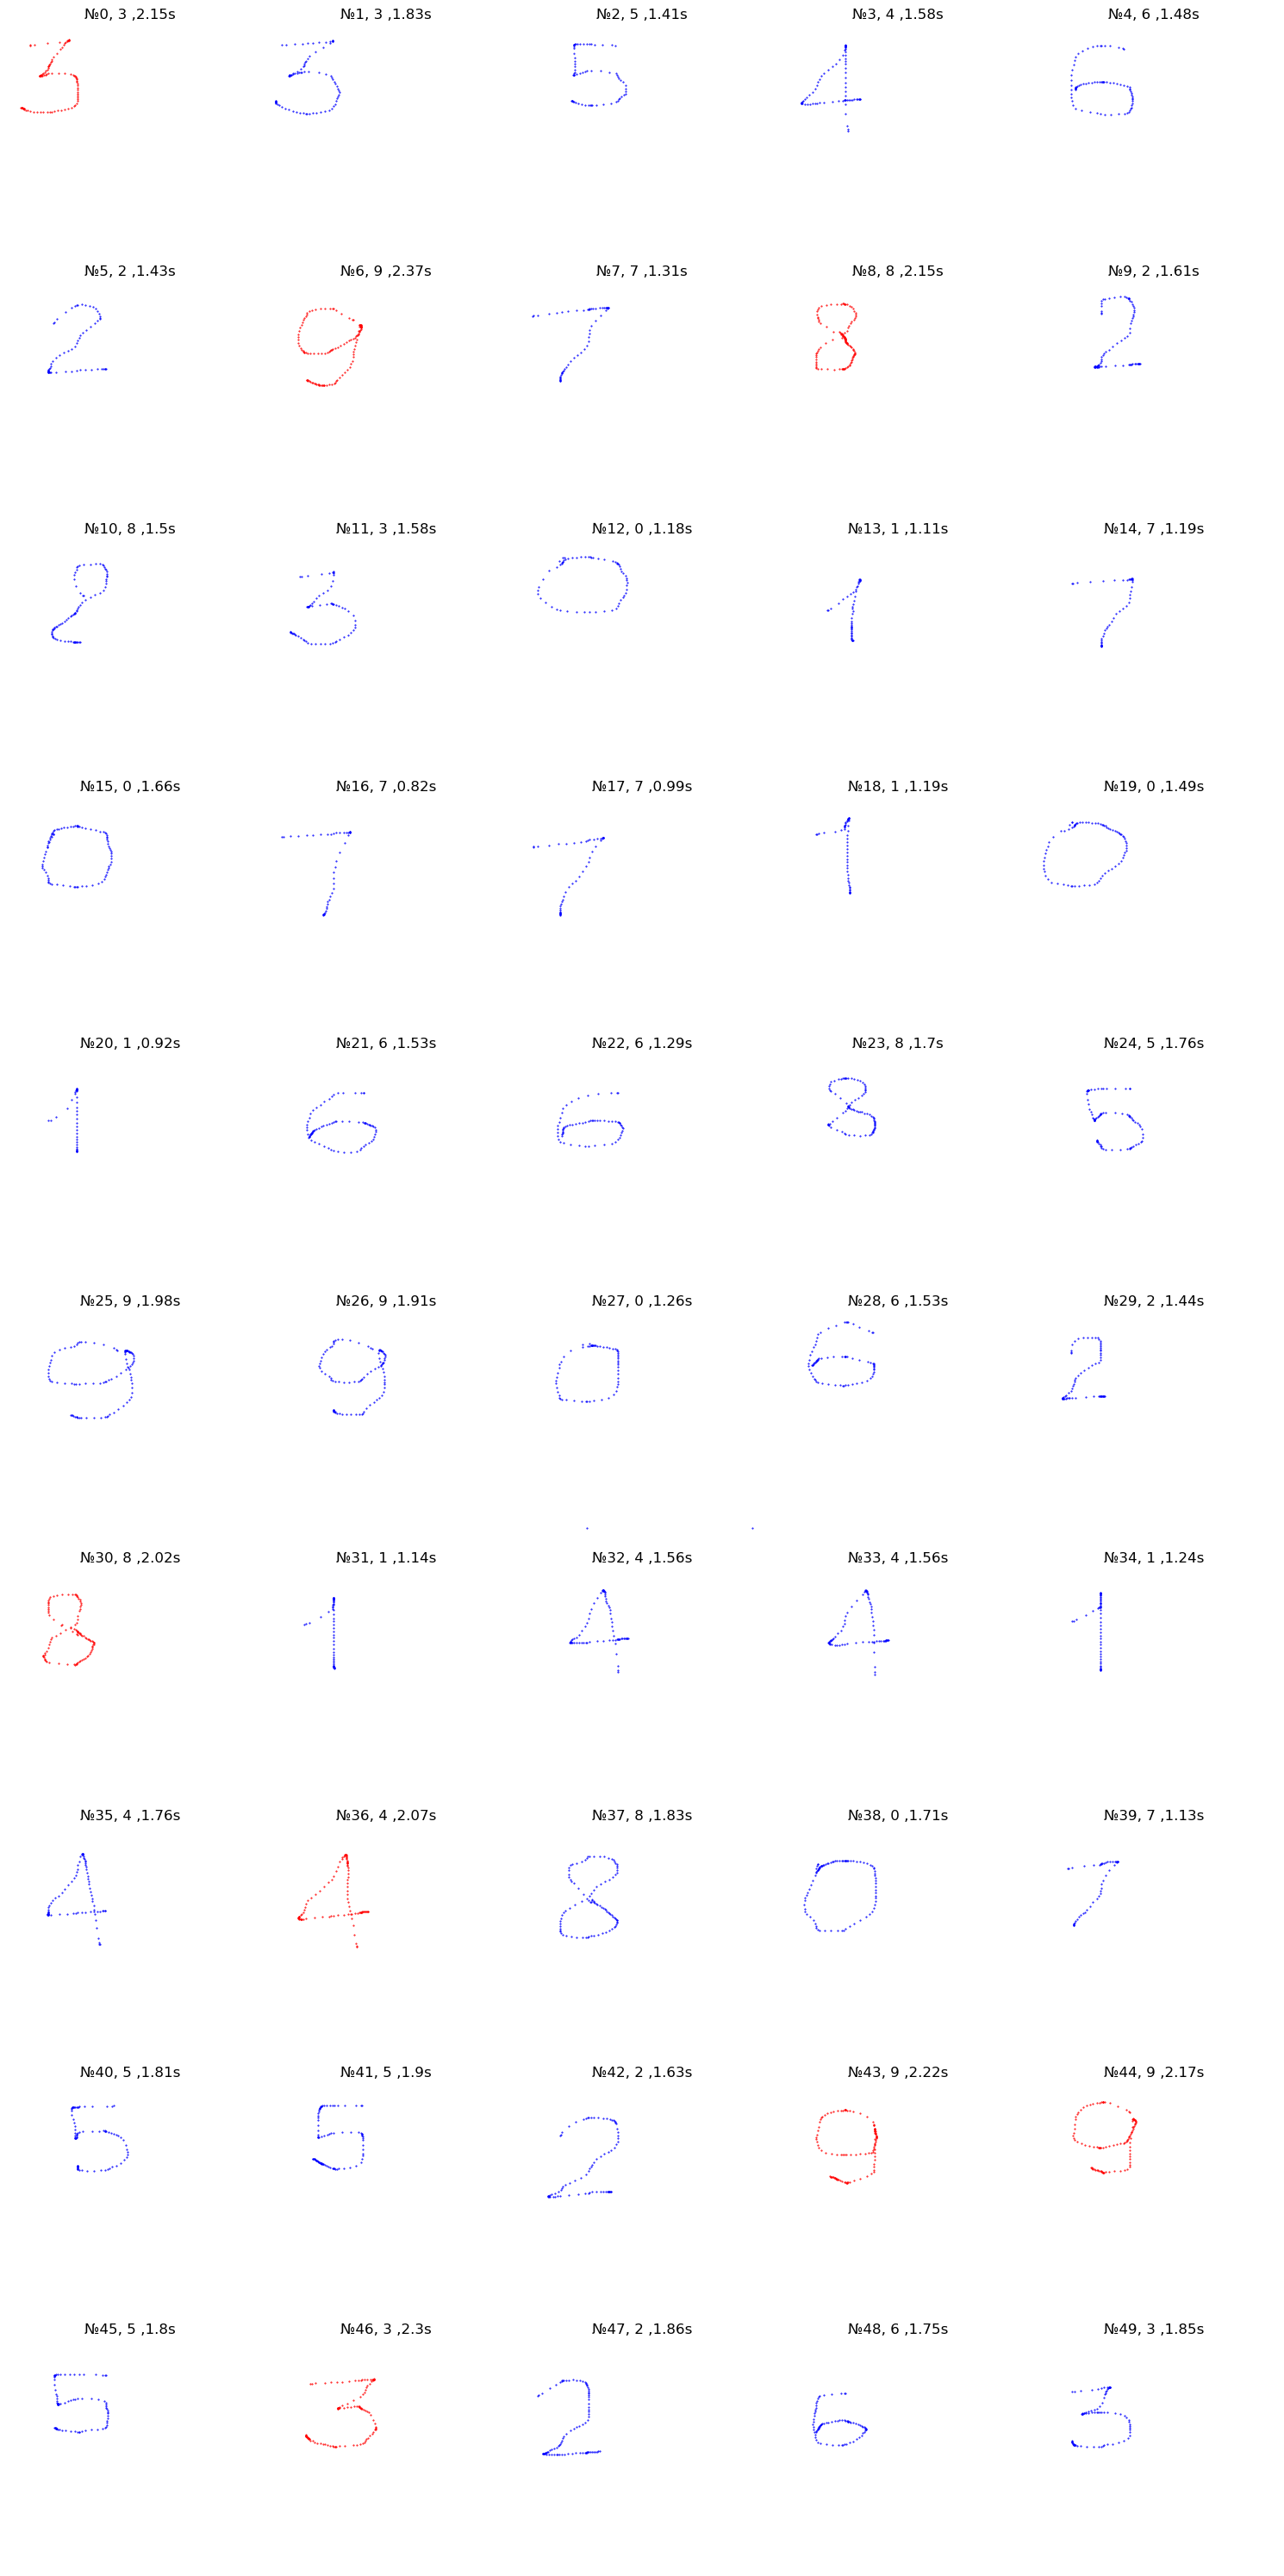

In [1334]:
df_motion=trials
df_protocol=pd.read_excel('8_Sessions/Digits_Tyumen_'+code+'.xlsx')
trials_times=[]

df_motion.Epoch.unique()
fig, axx = plt.subplots(10,5, sharex=True, sharey=True, figsize=(15,30) )
for ia, (ep, group) in enumerate(df_motion.groupby('Epoch')):

    trial_duration=round(group['ts'].values[-1]-group['ts'].values[0],2)
    trials_times.append(trial_duration)
    
    subtitle='№'+str(ep) +', '+str(df_protocol['Digit_text'].values[ia])+' ,'+str(trial_duration)+'s'
    color='r' if trial_duration>2 else 'b'
    
    plt.sca(axx.reshape(-1)[ia])
    plt.plot(*(group.loc[:, ['X', 'Y']].values.T), color+'.', ms=1)
    plt.ylabel(df_protocol.loc[ia, 'Digit_text'])
    plt.axis(False) 
    plt.title(subtitle)


plt.gca().invert_yaxis()

plt.tight_layout()

In [1336]:
trials_=trials[['ts','X','Y','Epoch']]

In [1338]:
trials_

,ts,X,Y,Epoch
0,0.000000,220,384.0,0
1,348.160004,213,381.0,1
2,348.260126,220,381.0,1
3,348.277078,237,379.0,1
4,348.293806,253,378.0,1
...,...,...,...,...
3996,424.952691,257,633.0,49
3997,424.969573,257,631.0,49
3998,424.986298,257,630.0,49
3999,425.003068,257,629.0,49


### S105

In [1341]:
trials_=trials_[trials_['Epoch']==2]
trials_

,ts,X,Y,Epoch
185,15.245410,365,383.0,2
186,15.362636,358,382.0,2
187,15.379814,340,381.0,2
188,15.396399,324,380.0,2
189,15.413109,317,379.0,2
...,...,...,...,...
251,16.589914,281,553.0,2
252,16.606522,282,555.0,2
253,16.623655,280,553.0,2
254,16.640582,280,552.0,2


In [1343]:
times=trials_.ts.values#-start_time

inds_from_start=np.where(times>=0)[0] #берем индексы, где время больше 0

times=times[inds_from_start]

x=trials_.X.values[inds_from_start]
y=trials_.Y.values[inds_from_start]

### Для всех остальных 

In [1049]:
trials_=trials_[trials_['Epoch']==1]
trials_

,ts,X,Y,Epoch
76,8.550973,214,483.0,1
77,8.735587,215,481.0,1
78,8.752178,220,474.0,1
79,8.768885,235,455.0,1
80,8.785637,248,442.0,1
...,...,...,...,...
148,9.994643,338,662.0,1
149,10.011079,349,662.0,1
150,10.028086,359,661.0,1
151,10.044809,365,661.0,1


In [1051]:
times=trials_.ts.values#-start_time

inds_from_start=np.where(times>=0)[0] #берем индексы, где время больше 0

times=times[inds_from_start]

x=trials_.X.values[inds_from_start]
y=trials_.Y.values[inds_from_start]

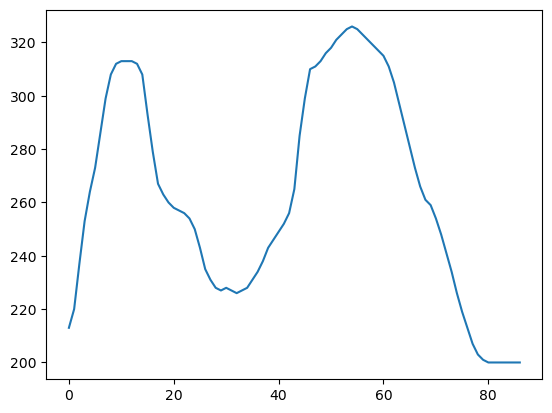

In [984]:
plt.plot(x)

## Загружаем таблицу с метками стирания

In [1345]:
marks=pd.read_csv(subject+'/Preprocessed/'+code+'/marks_processed.csv',sep=';')

In [1347]:
marks.head(50)

,Unnamed: 0,INPUT,TYPE,ts,ResetCounter,Epoch,X,Y
0,278,/dev/input/event0:,EV_ABS,2.117363,1,0,-1,-1
1,295,/dev/input/event0:,EV_ABS,3.008759,2,0,-1,-1
2,299,/dev/input/event0:,EV_ABS,3.922622,3,0,-1,-1
3,303,/dev/input/event0:,EV_ABS,4.722857,4,0,-1,-1
4,307,/dev/input/event0:,EV_ABS,10.849836,5,1,-1,-1
5,311,/dev/input/event0:,EV_ABS,11.690964,6,1,-1,-1
6,315,/dev/input/event0:,EV_ABS,12.570442,7,1,-1,-1
7,319,/dev/input/event0:,EV_ABS,13.389680,8,1,-1,-1
8,523,/dev/input/event0:,EV_ABS,19.568382,9,2,-1,-1
9,527,/dev/input/event0:,EV_ABS,20.482564,10,2,-1,-1


In [1349]:
dfdf=pd.DataFrame(columns=trials.columns) #создаем пустой дф с колонками из trials

In [1351]:
n_trials=50

### S105

При вставке числа из другой эпохи происходит несостыковка по времени, из-за которой дальше не получается добавть метки.

Поэтому я удалю первые 2 эпохи

In [1318]:
trials=trials[trials['Epoch']>1] 

In [1320]:
trials

,Unnamed: 0,INPUT,ts,ResetCounter,X,Y,Epoch
185,185,/dev/input/event0:,15.245410,8,365,383.0,2
186,186,/dev/input/event0:,15.362636,8,358,382.0,2
187,187,/dev/input/event0:,15.379814,8,340,381.0,2
188,188,/dev/input/event0:,15.396399,8,324,380.0,2
189,189,/dev/input/event0:,15.413109,8,317,379.0,2
...,...,...,...,...,...,...,...
3996,3996,/dev/input/event0:,424.952691,196,257,633.0,49
3997,3997,/dev/input/event0:,424.969573,196,257,631.0,49
3998,3998,/dev/input/event0:,424.986298,196,257,630.0,49
3999,3999,/dev/input/event0:,425.003068,196,257,629.0,49


### Остальные

Не берем в рассмотрение нулевую эпоху с первым числом

In [1353]:
trials=trials[trials['Epoch']>0] 

In [1355]:
trials

,Unnamed: 0,INPUT,ts,ResetCounter,X,Y,Epoch
1,1,/dev/input/event0:,348.160004,160,213,381.0,1
2,2,/dev/input/event0:,348.260126,160,220,381.0,1
3,3,/dev/input/event0:,348.277078,160,237,379.0,1
4,4,/dev/input/event0:,348.293806,160,253,378.0,1
5,5,/dev/input/event0:,348.310458,160,264,376.0,1
...,...,...,...,...,...,...,...
3996,3996,/dev/input/event0:,424.952691,196,257,633.0,49
3997,3997,/dev/input/event0:,424.969573,196,257,631.0,49
3998,3998,/dev/input/event0:,424.986298,196,257,630.0,49
3999,3999,/dev/input/event0:,425.003068,196,257,629.0,49


## Добавляем метки -2 для обозначения начала письма и -3 для окончания письма

начало и окончание письма здесь по данным с планшета, а не с сенсора давления

In [1029]:
for i in range(1,n_trials):

    #добавляем время до начала эпохи, то есть момент до начала движения
    tt=tt=trials[trials['Epoch']==i].iloc[0].values[2]-1/1000 #берем первую строку для i-й эпохи и из времени ts вычитаем 1 миллисекунду
    dfdf.loc[len(dfdf)]=[None,'/dev/input/event0:',tt,None,-2,-2,i-1]
    
    tt=tt=trials[trials['Epoch']==i].iloc[0].values[2]-2/1000
    dfdf.loc[len(dfdf)]=[None,'/dev/input/event0:',tt,None,-2,-2,i-1]

    #после окончания движения 
    tt=tt=trials[trials['Epoch']==i].iloc[-1].values[2]+1/1000
    dfdf.loc[len(dfdf)]=[None,'/dev/input/event0:',tt,None,-3,-3,i]
    
    tt=tt=trials[trials['Epoch']==i].iloc[-1].values[2]+2/1000
    dfdf.loc[len(dfdf)]=[None,'/dev/input/event0:',tt,None,-3,-3,i]
    
    

ValueError: cannot set a row with mismatched columns

In [1094]:
len(dfdf)

0

In [1357]:
### S105
for i in range(2,n_trials):

    #добавляем время до начала эпохи, то есть момент до начала движения
    tt=tt=trials[trials['Epoch']==i].iloc[0].values[2]-1/1000 #берем первую строку для i-й эпохи и из времени ts вычитаем 1 миллисекунду
    dfdf.loc[len(dfdf)]=[None,'/dev/input/event0:',tt,None,-2,-2,i-1]
    
    tt=tt=trials[trials['Epoch']==i].iloc[0].values[2]-2/1000
    dfdf.loc[len(dfdf)]=[None,'/dev/input/event0:',tt,None,-2,-2,i-1]

    #после окончания движения 
    tt=tt=trials[trials['Epoch']==i].iloc[-1].values[2]+1/1000
    dfdf.loc[len(dfdf)]=[None,'/dev/input/event0:',tt,None,-3,-3,i]
    
    tt=tt=trials[trials['Epoch']==i].iloc[-1].values[2]+2/1000
    dfdf.loc[len(dfdf)]=[None,'/dev/input/event0:',tt,None,-3,-3,i]

In [1359]:
marks = marks[['Unnamed: 0','INPUT','ts','ResetCounter','X','Y','Epoch']]

In [1361]:
marks

,Unnamed: 0,INPUT,ts,ResetCounter,X,Y,Epoch
0,278,/dev/input/event0:,2.117363,1,-1,-1,0
1,295,/dev/input/event0:,3.008759,2,-1,-1,0
2,299,/dev/input/event0:,3.922622,3,-1,-1,0
3,303,/dev/input/event0:,4.722857,4,-1,-1,0
4,307,/dev/input/event0:,10.849836,5,-1,-1,1
...,...,...,...,...,...,...,...
195,11677,/dev/input/event0:,421.134296,196,-1,-1,48
196,11917,/dev/input/event0:,427.162432,197,-1,-1,49
197,11921,/dev/input/event0:,428.042772,198,-1,-1,49
198,11925,/dev/input/event0:,428.859566,199,-1,-1,49


## Объединяем метки стирания, начала и окончания письма и письмо. 

Сортируем по времени

In [1375]:
df_all=pd.concat([marks,trials,dfdf])

In [1377]:
df_all.sort_values('ts',inplace=True)

In [1379]:
df_all[df_all['ResetCounter']!=0] 

,Unnamed: 0,INPUT,ts,ResetCounter,X,Y,Epoch
0,278,/dev/input/event0:,2.117363,1,-1,-1.0,0
1,295,/dev/input/event0:,3.008759,2,-1,-1.0,0
2,299,/dev/input/event0:,3.922622,3,-1,-1.0,0
3,303,/dev/input/event0:,4.722857,4,-1,-1.0,0
4,307,/dev/input/event0:,10.849836,5,-1,-1.0,1
...,...,...,...,...,...,...,...
191,None,/dev/input/event0:,425.022252,None,-3,-3.0,49
196,11917,/dev/input/event0:,427.162432,197,-1,-1.0,49
197,11921,/dev/input/event0:,428.042772,198,-1,-1.0,49
198,11925,/dev/input/event0:,428.859566,199,-1,-1.0,49


In [1381]:
df_all.head(60)

,Unnamed: 0,INPUT,ts,ResetCounter,X,Y,Epoch
0,278,/dev/input/event0:,2.117363,1,-1,-1.0,0
1,295,/dev/input/event0:,3.008759,2,-1,-1.0,0
2,299,/dev/input/event0:,3.922622,3,-1,-1.0,0
3,303,/dev/input/event0:,4.722857,4,-1,-1.0,0
4,307,/dev/input/event0:,10.849836,5,-1,-1.0,1
5,311,/dev/input/event0:,11.690964,6,-1,-1.0,1
6,315,/dev/input/event0:,12.570442,7,-1,-1.0,1
7,319,/dev/input/event0:,13.389680,8,-1,-1.0,1
1,None,/dev/input/event0:,15.243410,None,-2,-2.0,1
0,None,/dev/input/event0:,15.244410,None,-2,-2.0,1


In [1294]:
plt.figure(figsize=(20,10))

plt.plot(df_all['Epoch'].values/5, label='Epochs')
plt.plot(df_all['X'].values/100,'.',label='X coordinates')
plt.legend()
plt.show()


## Чтение данных из записи

In [1414]:
events=np.load(subject+'/Preprocessed/'+'1'+'/events.npy')

Для S101 нужно брать следующие срезы: 
1) 1-50
2) 52-101
3) 103-152
4) 154-203
5) 205-254
   
Не берем первое и последнее события.

Для S104 (во 2,4,5 сессиях нет 1-го числа в ээг, поэтому не делаю пропуск первого(который есть) для этих сессий. 

1) 1-50
2) 51-100
3) 102-151
4) 152-201
5) 202-251
   
Для S105 нужно брать следующие срезы: 
1) 1-50
2) 52-101
3) 103-152
4) 154-203
5) 206-254
   

In [1416]:
events=events[205:254] 

In [1418]:
len(events) 

49

### Загружаем ээг

In [1420]:
raw=mne.io.read_raw_fif(subject+'/Preprocessed/'+'1'+'/first_raw.fif', preload=True)

Opening raw data file S105/Preprocessed/1/first_raw.fif...
Isotrak not found
    Range : 0 ... 5664767 =      0.000 ...  2766.000 secs
Ready.
Reading 0 ... 5664767  =      0.000 ...  2766.000 secs...


In [857]:
raw.ch_names

['EEG 1_1',
 'EEG 1_2',
 'EEG 1_3',
 'EEG 1_4',
 'EEG 1_5',
 'EEG 1_7',
 'EEG 1_8',
 'EEG 3_1',
 'EEG 3_2',
 'EEG 3_3',
 'EEG 3_4',
 'B',
 'C']

S101: 'EEG L.vis__1','EEG R.vis__7', 'EEG R.vis__8'

S104: 'EEG L.vis__1', 'EEG L.lob__7', 'EEG L.lob__8', 'EEG R.lob__1', 'EEG R.vis__1', 'EEG R.vis__2', 'EEG L.lob__6'

In [256]:
bad_chs=['EEG L.vis__1','EEG R.vis__7', 'EEG R.vis__8']

In [258]:
raw.drop_channels(bad_chs)

<Raw | first_raw.fif, 23 x 5545984 (2708.0 s), ~973.2 MB, data loaded>

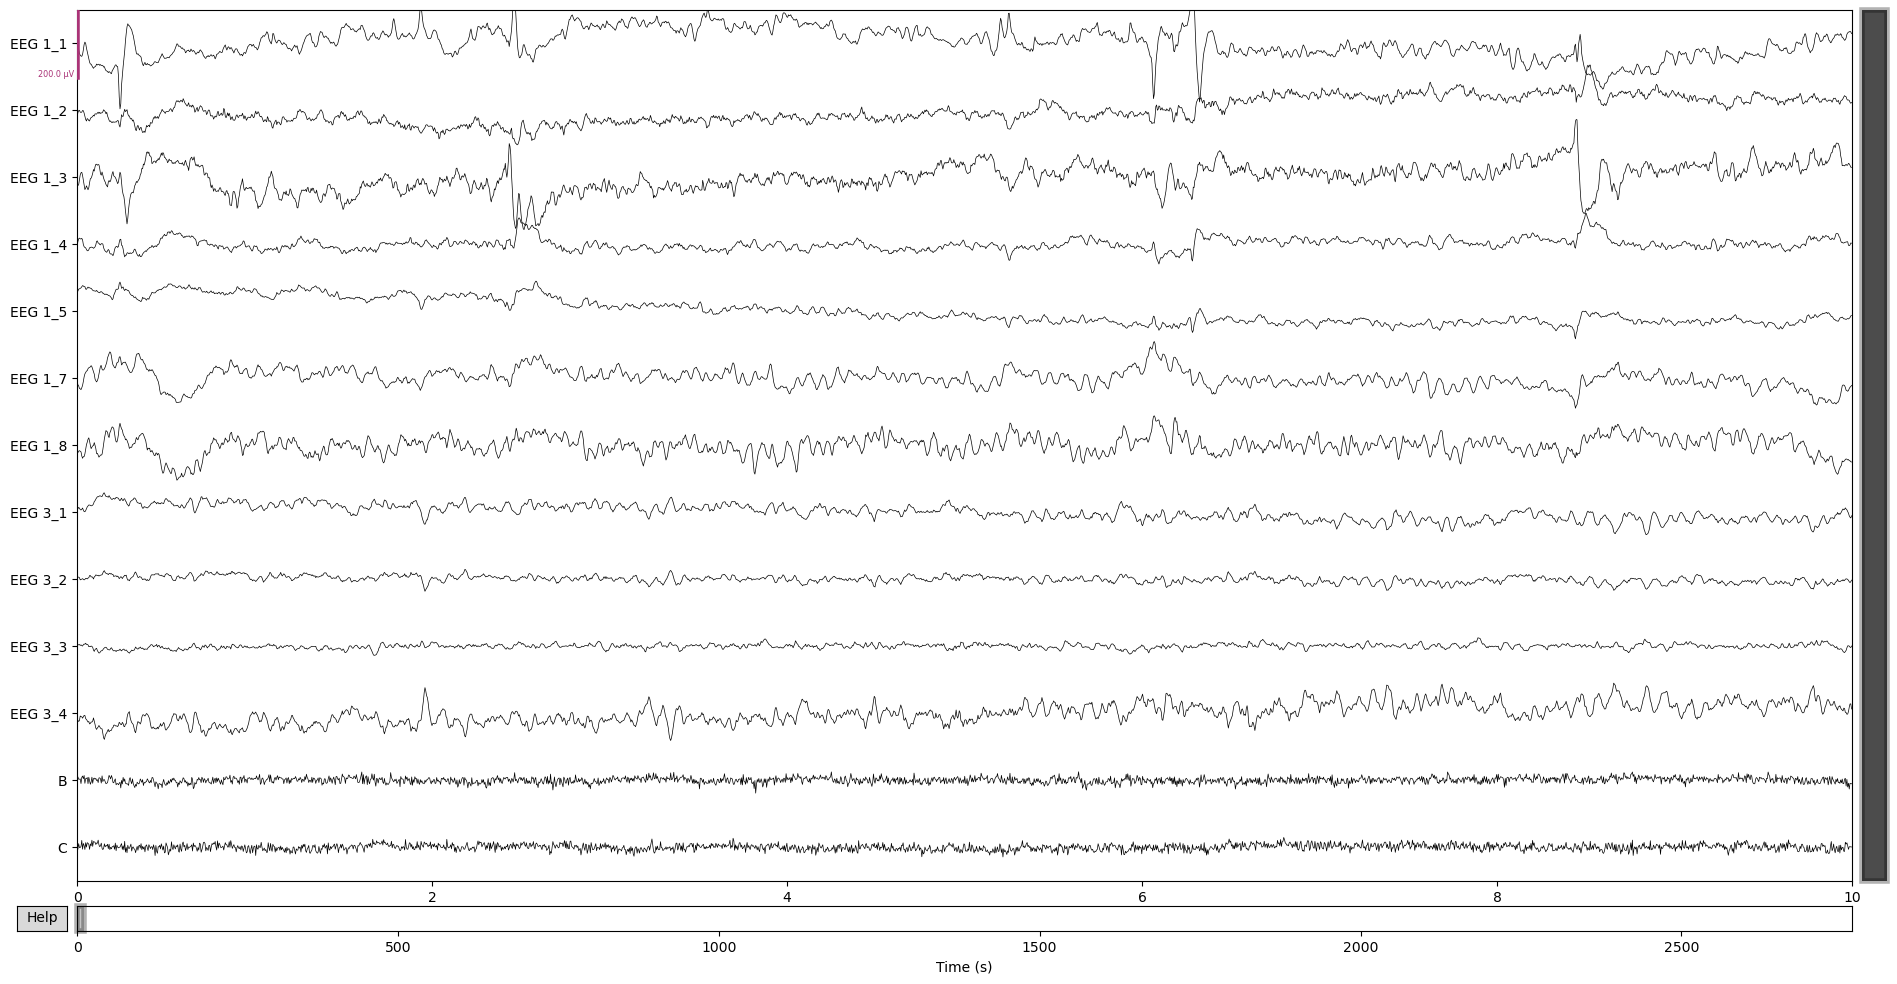

In [1507]:
%matplotlib qt5
raw.plot(scalings={'eeg':1e-4})

Время начала сессии: первая метка делится на частоту дискретизации => получаем время в секундах

In [1392]:
time_start=events[0,0]//raw.info['sfreq'] 


In [1394]:
events[0,0]

4729858

In [1396]:
time_start

2309.0

## Создаем эпохи относительно первого стирания 

In [1422]:
epochs=mne.Epochs(raw,events=events, event_id=0, tmin=0,tmax=8,preload=True, baseline=None,
                  reject_by_annotation=False)

Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 49 events and 16385 original time points ...
0 bad epochs dropped


In [1424]:
times=df_all.ts.values
x=df_all.X.values 
y=df_all.Y.values

In [1426]:
df_all.head(20)

,Unnamed: 0,INPUT,ts,ResetCounter,X,Y,Epoch
0,278,/dev/input/event0:,2.117363,1,-1,-1.0,0
1,295,/dev/input/event0:,3.008759,2,-1,-1.0,0
2,299,/dev/input/event0:,3.922622,3,-1,-1.0,0
3,303,/dev/input/event0:,4.722857,4,-1,-1.0,0
4,307,/dev/input/event0:,10.849836,5,-1,-1.0,1
5,311,/dev/input/event0:,11.690964,6,-1,-1.0,1
6,315,/dev/input/event0:,12.570442,7,-1,-1.0,1
7,319,/dev/input/event0:,13.389680,8,-1,-1.0,1
1,None,/dev/input/event0:,15.243410,None,-2,-2.0,1
0,None,/dev/input/event0:,15.244410,None,-2,-2.0,1


## Интерполируем Х и Y

чтобы получить новые временные метки, соответсвующие частоте дискретизации 

In [1428]:
import matplotlib.pyplot as plt
from scipy import interpolate

sf=raw.info['sfreq']

f = interpolate.interp1d(times, x) 
timesnew = np.arange(times[0], times[-1], 1/sf)
xnew = f(timesnew)  

f = interpolate.interp1d(times, y)
timesnew = np.arange(times[0], times[-1], 1/sf)
ynew = f(timesnew)  

In [1274]:
plt.figure()
plt.plot(times,x,'.', label='original data')
plt.plot(timesnew,xnew,label='interpolated data') 
plt.legend()
plt.show()

Сохраняем первую метку в секундах и в отсчетах

In [1430]:
sec_add = 0
adding_in_secs=np.round(events[0,0]/epochs.info['sfreq'],3) + sec_add
adding_in_ts=events[0,0] + sec_add*epochs.info['sfreq']

S104. 1-я сессия: добавляю 0.2 секунды. 2,3,4-я: ничего не вычитаю. 5: +0.1

S105. 1: +0.2   2: +0.5

In [1434]:
adding_in_secs

2300.785

In [1432]:
adding_in_ts

4712007.0

## Строим график данных с планшета, сенсора и амплификатора

In [1251]:
marks_ch='B'
sensor_ch='C'

In [1436]:
#S105
marks_ch='C'
sensor_ch='B'

In [1438]:
%matplotlib qt5

plt.plot(times-times[0]+adding_in_secs, x,'.-b', alpha=0.4, label='Tablet') #по оси OУ значения Х с планшета
plt.scatter(times[np.where(x==-1)[0]]-times[0]+adding_in_secs, xnew[np.where(x==-1)[0]], label='CLear mark') 
#берем те временные отметки, где х==-1, т.е. стирание, смещаем, корректируем и отображаем с интерполирвоанным Х

plt.scatter(timesnew[np.where(xnew==-2)[0]]-timesnew[0]+adding_in_secs, xnew[np.where(xnew==-2)[0]], label='Start of handwriting')

plt.plot(raw[marks_ch][1],raw[marks_ch][0][0]*100*3e1,'-r', alpha=0.4, label='Pressure Sensor') #временные метки канала В; значения данных из этого канала * на масштаб 
plt.plot(raw[sensor_ch][1],raw[sensor_ch][0][0]*100*3e1,'-g', alpha=0.4, label='Amplifier')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.06), ncol=5)
plt.show()

S101: ничего не добавляла

S104: +0.2 секунды в 1 сессии (на графиках нчиего). +0.1 в 5-й 

Везде у s101 наблюдается отставание сенсора от планшета. У s104 в первой, третьей, пятой сессиях отстает, во второй, четвертой несильно

Удаляем лишние события, возникшие после интерполяции

In [1442]:
events_times_new=np.where(xnew==-2)[0] #начало письма


In [1444]:
vvv=np.where(events_times_new[1:]-events_times_new[:-1]==1)[0] #разность =1, когда коды начала записи из 1 эпохи

In [1446]:
len(vvv)

50

In [1448]:
events_times_new=np.delete(events_times_new, vvv)

In [1450]:
len(events_times_new)

48

In [1452]:
events_times_new

array([ 26884,  45881,  66884,  82289,  99499, 117112, 135332, 153421,
       180143, 189434, 208001, 226310, 246216, 262001, 279748, 298743,
       316057, 333851, 354294, 369769, 389263, 405064, 423000, 441039,
       458236, 476550, 494341, 511395, 528998, 546587, 564418, 582386,
       599546, 616944, 633884, 651837, 668758, 686536, 704004, 721937,
       739717, 757512, 775018, 792424, 810464, 827834, 844964, 862315],
      dtype=int64)

In [1454]:
events_new=events.copy()

In [1456]:
len(events_new)

49

In [1468]:
#S105 поскольку 1 еще убрали
events_new = events_new[1:, :]

In [1470]:
len(events_new)

48

In [910]:
#events_times=np.array(events_times_new)+adding_in_ts 
#events_zeros=np.zeros(len(events_times_new))
#events_codes=np.zeros(len(events_times_new)) 
#events_new=np.vstack([events_times,events_zeros,events_codes]).T.astype(int) 

In [1458]:
len(events_times_new)

48

Здесь можно добавить поправку по времени для создания эпох. S101 0 секунд или 2

In [1472]:
correction = 0 #нужно сверить по графикам plot_image 
events_new[:49,0]=events_times_new[:]+adding_in_ts +correction # к каждому элементу добавляем поправку

# Метки ЭЭГ идут раньше чем метки планшета
# Добавля к меткам планшета време первой метки на ЭЭГ мы уравниваем их в единое время

## Создаем эпохи относительно события начала письма

In [1474]:
raw

<Raw | first_raw.fif, 13 x 5664768 (2766.0 s), ~561.9 MB, data loaded>

In [1476]:
raw_marks=raw.copy().drop_channels(raw.ch_names[:-2]) #берем последние 2 канала
raw_data=raw.copy().drop_channels(raw.ch_names[-2:]) #останутся все каналы, кроме двух последних (В,С)

In [1478]:
epochs_data=mne.Epochs(raw_data,events=events_new, event_id=0, tmin=-2,tmax=7,preload=True, baseline=None, 
                  reject_by_annotation=False)

Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 48 events and 18433 original time points ...
0 bad epochs dropped


In [1480]:
epochs_marks=mne.Epochs(raw_marks,events=events_new, event_id=0, tmin=-2,tmax=7,preload=True, baseline=None,
                  reject_by_annotation=False)

Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 48 events and 18433 original time points ...
0 bad epochs dropped


In [1482]:
epochs_marks.copy().plot_image(picks=[1])

Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated


[<Figure size 640x480 with 3 Axes>]

In [425]:
#S105
epochs_marks.copy().plot_image(picks=[0])

Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated


[<Figure size 640x480 with 3 Axes>]

## Сохраняем эпохи и события

In [1484]:
code

'5'

In [1486]:
epochs_data.save(subject+'/Epochs/'+code+'/epochs-long-epo.fif', overwrite=True)

In [1488]:
epochs_marks.save(subject+'/Epochs/'+code+'/epochs-marks-long-epo.fif',overwrite=True)

In [1490]:
np.savetxt(subject+'/Epochs/'+code+'/events_array_eeg_data.csv',events_new)

## Сохраняем данные с планшета в виде эпох

In [1493]:
ch_names=epochs.ch_names

In [1495]:
info = mne.create_info(ch_names=['x', 'y'],
                       ch_types=['eeg'] * 2,
                       sfreq=raw.info['sfreq'])

In [1497]:
data=np.vstack([xnew,ynew])
simulated_raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=2, n_times=875588
    Range : 0 ... 875587 =      0.000 ...   427.533 secs
Ready.


In [943]:
events_times_new=np.where(xnew==-2)[0]
vvv=np.where(events_times_new[1:]-events_times_new[:-1]==1)[0]
events_times_new=np.delete(events_times_new, vvv)
events_new=events.copy()#[:-1]
events_new[:,0]=events_times_new

In [1499]:
# S105
events_times_new=np.where(xnew==-2)[0]
vvv=np.where(events_times_new[1:]-events_times_new[:-1]==1)[0]
events_times_new=np.delete(events_times_new, vvv)
events_new=events.copy()
#S105 поскольку 1 еще убрали
events_new = events_new[1:, :]
events_new[:,0]=events_times_new

In [1501]:
epochs_handwriting=mne.Epochs(simulated_raw,events=events_new, event_id=0, tmin=-2,tmax=4,preload=True, baseline=None,
                  reject_by_annotation=False, verbose=True)

Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 48 events and 12289 original time points ...
0 bad epochs dropped


In [450]:
#epochs_handwriting.drop_log

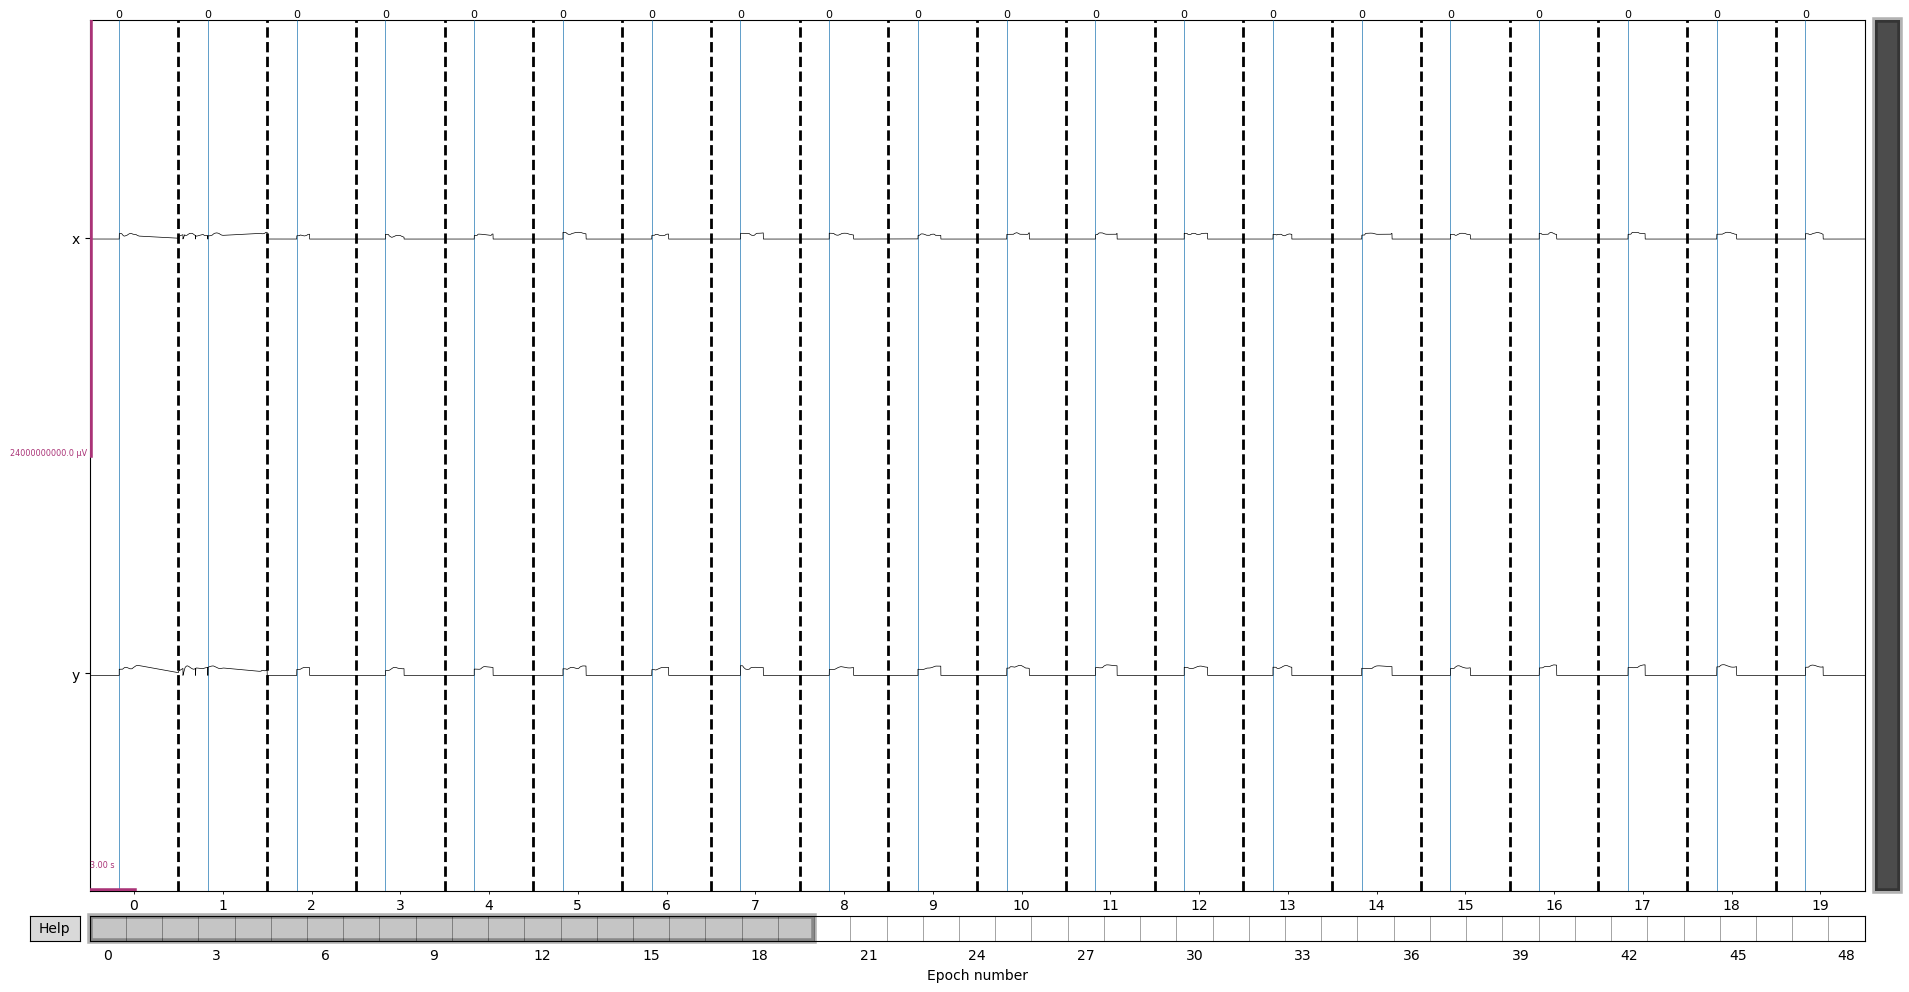

In [452]:
epochs_handwriting.plot(scalings={'eeg':12e3}, events=events_new)

In [1503]:
epochs_handwriting.save(subject+'/Epochs/'+code+'/epochs_handwriting_tablet-epo.fif', overwrite=True)

In [1505]:
np.savetxt(subject+'/Epochs/'+code+'/events_array_tablet_data.csv',events_new)

Дальше проверка, что есть везде метки -2 и -3 


In [967]:
code='1'
file_path = subject+'/Epochs/' + code + '/epochs_handwriting_tablet-epo.fif'

ep_hw = mne.read_epochs(file_path, preload=True) 
data_test=ep_hw.get_data()

Reading C:\Users\khani\skolteh\WEEK1\WEEK1\Epochs\1\epochs_handwriting_tablet-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =   -2000.00 ...    4000.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated


In [970]:
for i in range(data_test.shape[0]):
    epoch_data = data_test[i, 0, :]  # Данные из канала 0
    indices_minus2 = np.where(epoch_data == -2)[0]
    indices_minus3 = np.where(epoch_data == -3)[0]

    print(f"Эпоха {i}:")
    if indices_minus2.size > 0:
        print(f"  Индексы -2: {indices_minus2}")
    else:
        print(f"  Значение -2 отсутствует !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    
    if indices_minus3.size > 0:
        print(f"  Индексы -3: {indices_minus3}")
    else:
        print(f"  Значение -3 отсутствует !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")

Эпоха 0:
  Индексы -2: [4095 4096]
  Индексы -3: [6243 6244]
Эпоха 1:
  Индексы -2: [4095 4096]
  Индексы -3: [6658 6659]
Эпоха 2:
  Индексы -2: [4095 4096]
  Индексы -3: [5764 5765]
Эпоха 3:
  Индексы -2: [4095 4096]
  Индексы -3: [7010 7011]
Эпоха 4:
  Индексы -2: [4095 4096]
  Индексы -3: [7143 7144]
Эпоха 5:
  Индексы -2: [4095 4096]
  Индексы -3: [6525 6526]
Эпоха 6:
  Индексы -2: [4095 4096]
  Индексы -3: [6834 6835]
Эпоха 7:
  Индексы -2: [4095 4096]
  Индексы -3: [6315 6316]
Эпоха 8:
  Индексы -2: [4095 4096]
  Индексы -3: [7249 7250]
Эпоха 9:
  Индексы -2: [4095 4096]
  Индексы -3: [6144 6145]
Эпоха 10:
  Индексы -2: [4095 4096]
  Индексы -3: [12129 12130]
Эпоха 11:
  Индексы -2: [4095 4096]
  Значение -3 отсутствует !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Эпоха 12:
  Индексы -2: [4095 4096]
  Индексы -3: [3581 3582]
Эпоха 13:
  Индексы -2: [4094 4095 4096]
  Индексы -3: [7389 7390]
Эпоха 14:
  Индексы -2: [4095 4096]
  Индексы -3: [7255 7256]
Эпоха 15:
  Индексы -2: [4095 4096]
  Инд